# Split - Apply - Combine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [14]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_b0229f57d26048ebbeee34c5e21b1aaf(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_bf2b79002e2f945583a88d49bdccac9b516fdec6','domain': {'id': '78a6389428974e79aa679e33dc7dc070'},
            'password': 'pQ,Mqd4X1A(VmP(s'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df = pd.read_csv(get_object_storage_file_with_credentials_b0229f57d26048ebbeee34c5e21b1aaf('BigDataRealTimecomPythooneSpark', 'taxis_bikes_nycity.csv'), parse_dates=["Data"])



In [15]:
def calcula_total_segundos(time): 
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(":")
    seconds = int(seconds) + 60 * int(mins) + 60*60*int(hrs)
    return seconds


In [16]:
df["Segundos"] = df.Tempo.map(calcula_total_segundos)

In [17]:
df.fillna(0)

,Data,Distancia,Tempo,Segundos
0,2015-08-02,1.70,0,0.0
1,2015-08-03,1.40,0,0.0
2,2015-08-04,2.10,0,0.0
3,2015-08-06,2.38,0,0.0
4,2015-08-07,2.30,0,0.0
5,2015-08-08,3.40,0,0.0
6,2015-08-09,2.50,0,0.0
7,2015-08-10,3.36,0:28:37,1717.0
8,2015-08-11,1.67,0:13:07,787.0
9,2015-08-12,1.42,0:10:35,635.0


In [18]:
df["Minutos"] = df["Segundos"].map(lambda x: x/60)

In [40]:
df.fillna(0)

,Data,Distancia,Segundos,Minutos
0,2015-08-02,1.70,0.0,0.000000
1,2015-08-03,1.40,0.0,0.000000
2,2015-08-04,2.10,0.0,0.000000
3,2015-08-06,2.38,0.0,0.000000
4,2015-08-07,2.30,0.0,0.000000
5,2015-08-08,3.40,0.0,0.000000
6,2015-08-09,2.50,0.0,0.000000
7,2015-08-10,3.36,1717.0,28.616667
8,2015-08-11,1.67,787.0,13.116667
9,2015-08-12,1.42,635.0,10.583333


In [21]:
df.Distancia.max()

26.199999999999999

In [22]:
df.Minutos.min()

6.2666666666666666

In [30]:
len(df.Distancia[df.Distancia>10])

4

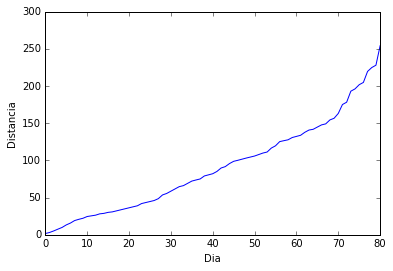

In [34]:
df.Distancia.cumsum().plot()
plt.xlabel("Dia")
plt.ylabel("Distancia")

In [35]:
#Deleta uma coluna
del(df["Tempo"])

In [42]:
df.drop("Segundos",axis=1)

,Data,Distancia,Minutos
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN
5,2015-08-08,3.40,NaN
6,2015-08-09,2.50,NaN
7,2015-08-10,3.36,28.616667
8,2015-08-11,1.67,13.116667
9,2015-08-12,1.42,10.583333


In [43]:
#Deleta linha
df.drop(1,axis=0)

,Data,Distancia,Segundos,Minutos
0,2015-08-02,1.70,NaN,NaN
2,2015-08-04,2.10,NaN,NaN
3,2015-08-06,2.38,NaN,NaN
4,2015-08-07,2.30,NaN,NaN
5,2015-08-08,3.40,NaN,NaN
6,2015-08-09,2.50,NaN,NaN
7,2015-08-10,3.36,1717.0,28.616667
8,2015-08-11,1.67,787.0,13.116667
9,2015-08-12,1.42,635.0,10.583333
10,2015-08-13,2.35,1045.0,17.416667


In [59]:
df["Dia_Semana"] = df.Data.map(lambda x : x.strftime("%A"))


In [60]:
df

,Data,Distancia,Segundos,Minutos,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,Friday
5,2015-08-08,3.40,NaN,NaN,Saturday
6,2015-08-09,2.50,NaN,NaN,Sunday
7,2015-08-10,3.36,1717.0,28.616667,Monday
8,2015-08-11,1.67,787.0,13.116667,Tuesday
9,2015-08-12,1.42,635.0,10.583333,Wednesday


# Group by

In [62]:
dias = df.groupby("Dia_Semana")

In [66]:
dias.size()


Dia_Semana
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

In [68]:
#Diferença na contagem indica valores nulos
dias.count()

,Data,Distancia,Segundos,Minutos
Dia_Semana,,,,
Friday,8,8,5,5
Monday,11,11,8,8
Saturday,15,15,8,8
Sunday,14,14,6,6
Thursday,8,8,7,7
Tuesday,14,14,10,10
Wednesday,11,11,8,8


In [69]:
dias.describe()

/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Distancia      Segundos     Minutos
Dia_Semana                                           
Friday     count   8.000000      5.000000    5.000000
           mean    6.315000   5071.800000   84.530000
           std     9.300811   6841.939067  114.032318
           min     0.900000    376.000000    6.266667
           25%     0.975000           NaN         NaN
           50%     1.835000           NaN         NaN
           75%     5.987500           NaN         NaN
           max    26.200000  15643.000000  260.716667
Monday     count  11.000000      8.000000    8.000000
           mean    2.422727   1185.750000   19.762500
           std     1.000241    496.970177    8.282836
           min     1.340000    523.000000    8.716667
           25%     1.450000           NaN         NaN
           50%     3.000000           NaN         NaN
           75%     3.050000           NaN         NaN
           max     4.030000   1822.000000   30.366667
Saturday   count  15.000000      8.000000    8.000000
           mean    2.786000   1458.500000   24.308333
           std     1.510718    922.571871   15.376198
           min     1.200000    545.000000    9.083333
           25%     1.370000           NaN         NaN
           50%     3.000000           NaN         NaN
           75%     3.250000           NaN         NaN
           max     5.630000   2945.000000   49.083333
Sunday     count  14.000000      6.000000    6.000000
           mean    3.246429   2802.500000   46.708333
           std     3.592504   2707.158640   45.119311
           min     0.650000    580.000000    9.666667
           25%     1.500000           NaN         NaN
           50%     1.935000           NaN         NaN
           75%     3.685000           NaN         NaN
           max    14.800000   8100.000000  135.000000
Thursday   count   8.000000      7.000000    7.000000
           mean    3.315000   1681.285714   28.021429
           std     3.562291   1922.363624   32.039394
           min     1.370000    537.000000    8.950000
           25%     1.467500           NaN         NaN
           50%     2.365000           NaN         NaN
           75%     2.637500           NaN         NaN
           max    12.000000   5940.000000   99.000000
Tuesday    count  14.000000     10.000000   10.000000
           mean    2.607143   1334.600000   22.243333
           std     1.688538    979.121965   16.318699
           min     0.650000    516.000000    8.600000
           25%     1.402500           NaN         NaN
           50%     1.885000           NaN         NaN
           75%     3.087500           NaN         NaN
           max     6.500000   3523.000000   58.716667
Wednesday  count  11.000000      8.000000    8.000000
           mean    2.428182   1306.250000   21.770833
           std     1.321990    826.652933   13.777549
           min     1.370000    545.000000    9.083333
           25%     1.370000           NaN         NaN
           50%     2.000000           NaN         NaN
           75%     3.050000           NaN         NaN
           max     5.630000   3110.000000   51.833333

# Series Temporais

In [70]:
!pip install pandas_datareader

    100% |████████████████████████████████| 71kB 864kB/s 
  Running setup.py bdist_wheel for requests-ftp ... - \ | done
  Stored in directory: /gpfs/fs01/user/s30d-d3b17f6334c207-f946bb9d3c79/.cache/pip/wheels/76/fb/0d/1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-ftp


In [71]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from matplotlib import style
%matplotlib inline

In [72]:
style.use("fivethirtyeight")

# Cotações a partir do Yahoo

In [85]:
#Cotações da empresa petrobras
start = datetime.datetime(2017,4,1)
end = datetime.datetime(2017,4,18)
empresa = "PBR"
ptbr = web.get_data_yahoo(empresa,start,end)

In [86]:
type(ptbr)

pandas.core.frame.DataFrame

In [87]:
ptbr.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,9.81,9.85,9.66,9.75,18621700,9.75
2017-04-04,9.73,9.96,9.65,9.95,18271300,9.95
2017-04-05,10.06,10.17,9.74,9.79,22794400,9.79
2017-04-06,9.77,9.95,9.57,9.67,22531200,9.67
2017-04-07,9.80,9.92,9.71,9.76,24379200,9.76


In [88]:
nao_primos = [j for i in range(2, 8) for j in range(i * 2, 50, i)]
primos = [x for x in range(2, 50) if x not in nao_primos]
print(primos[15])

IndexError: list index out of range